In [1]:
# loading libraries and reading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Analysis

In [2]:
# creating dictionary objects from the files for companies and rounds2.csv file
companies = pd.read_csv("..//companies.txt",sep ='\t', encoding ='ISO-8859-1')
rounds2 = pd.read_csv("../Session-1/rounds2.csv",sep =',', encoding ='ISO-8859-1')

In [3]:
#getting to know the data in companies files.
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
#getting to know the data in rounds file.
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
#Checkpoint 1 : 

#To convert the links in both the dataframes to lower case in order to merge the data frames.
#creating temprory columns in order to merge rounds and companies data frames.
rounds2['permalink_lower'] = rounds2['company_permalink'].str.lower()
companies['permalink_lower'] = companies['permalink'].str.lower()

# Merging Countries with Rounds2 DataFrames to get all the company codes in companies dataframe on the basis of 
# company_permalink column. This way, we will be able to find all the companies present in the rounds2 dataframe.
master_frame = pd.merge(rounds2, companies, how='inner',on = 'permalink_lower')

#dropping the temprory column created to merge the 2 dataframes -> rounds2,companies.
rounds2.drop('permalink_lower', axis=1, inplace=True)
companies.drop('permalink_lower', axis=1, inplace=True)
master_frame.drop('permalink_lower', axis=1, inplace=True)

In [6]:
#Question 1 How many unique companies are present in rounds2?
#Output : Count of unique companies present in rounds2 dataframe.
master_frame['name'].nunique()

66097

In [7]:
#Checkpoint 1 : question 2 : How many unique companies are present in companies?
#Output : Count of unique companies present in companies dataframe.
companies['name'].nunique()

66102

In [8]:
#question 3 and 4 are derivatives of question 1 and question 2.. skipping in notebook

#Checkpoint 1 : question 5 : How many observations are present in master_frame ?
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
company_permalink          114942 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [9]:
#Understanding master data frame.
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [10]:
#Checkpoint 2 : Converting all amound raised from NaN to 0.. for better calculations and understanding.
master_frame['raised_amount_usd'] = master_frame.raised_amount_usd.replace(np.NaN, 0)
pd.set_option('float_format', '{:3,.2f}'.format)

In [11]:
#Checkpoint 2 : Getting the average of funding amount per funding type.
df_fundingVentureType = master_frame.groupby(["funding_round_type"]).raised_amount_usd.mean()
df_fundingVentureType

funding_round_type
angel                       764,564.35
convertible_note          1,157,471.42
debt_financing           16,517,018.26
equity_crowdfunding         202,983.16
grant                     4,152,010.98
non_equity_assistance       157,161.38
post_ipo_debt           168,704,571.82
post_ipo_equity          80,894,367.01
private_equity           62,111,788.23
product_crowdfunding      1,283,338.03
secondary_market         25,152,514.77
seed                        556,662.91
undisclosed               6,216,342.60
venture                  10,634,246.06
Name: raised_amount_usd, dtype: float64

In [12]:
#Checkpoint 2 : question 1 : Average funding amount of venture type ?
round(df_fundingVentureType['venture'],2)

10634246.06

In [13]:
#Checkpoint 2 : question 2 : Average funding amount of angel type ?
round(df_fundingVentureType['angel'],2)

764564.35

In [14]:
#Checkpoint 2 : question 3 : Average funding amount of seed type ?
round(df_fundingVentureType['seed'],2)

556662.91

In [15]:
#Checkpoint 2 : question 4 : Average funding amount of private equity type ?
round(df_fundingVentureType['private_equity'],2)

62111788.23

In [16]:
#Checkpoint 2 : question 4 : To get the funding type between 5 mil and 15 mil

df = master_frame.groupby(["funding_round_type"]).raised_amount_usd.mean() > 5000000
df2 = master_frame.groupby(["funding_round_type"]).raised_amount_usd.mean() < 15000000
#check the fund types who are true if we compare above mentioned dataframes
pd.concat([df, df2], axis = 1)

,raised_amount_usd,raised_amount_usd
funding_round_type,,
angel,False,True
convertible_note,False,True
debt_financing,True,False
equity_crowdfunding,False,True
grant,False,True
non_equity_assistance,False,True
post_ipo_debt,True,False
post_ipo_equity,True,False
private_equity,True,False


In [17]:
#Checkpoint 3 : Getting the dataframe which belongs to venture fund type for further data analysis.
df_venture_funding_type = master_frame.loc[master_frame['funding_round_type'] == 'venture', :]
df_venture_funding_type.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,0.00,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00",/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,0.00,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [18]:
# Checkpoint 3 : The top nine countries which have received the highest total funding 
top9 = df_venture_funding_type.groupby(df_venture_funding_type['country_code']).raised_amount_usd.sum().sort_values(ascending = False).nlargest(9).reset_index()
top9

,country_code,raised_amount_usd
0,USA,"422,510,842,796.00"
1,CHN,"39,835,418,773.00"
2,GBR,"20,245,627,416.00"
3,IND,"14,391,858,718.00"
4,CAN,"9,583,332,317.00"
5,FRA,"7,259,536,732.00"
6,ISR,"6,907,514,579.00"
7,DEU,"6,346,959,822.00"
8,JPN,"3,363,676,611.00"


In [19]:
# Loading mappings file in the notebook for further analysis
mapping = pd.read_csv("../Session-1/mapping.csv",sep =',', encoding ='ISO-8859-1')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [20]:
# Cleaning the data by removing 0 to NaN and further dropping such values to fetch the main sector information
mapping_replace_zero = mapping.replace(0, np.nan)
mapped_sectors = pd.melt(mapping_replace_zero, id_vars=['category_list'], var_name='main_category').dropna()
mapped_sectors.head()

,category_list,main_category,value
8,Adventure Travel,Automotive & Sports,1.00
14,Aerospace,Automotive & Sports,1.00
45,Auto,Automotive & Sports,1.00
46,Automated Kiosk,Automotive & Sports,1.00
47,Automotive,Automotive & Sports,1.00


In [21]:
# Deriving the primary sector per company by splitting and taking the first category in category list column.
companies['primary sector'] = companies['category_list'].str.split('|').str[0]
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software


In [22]:
# Create main sector data frame which contains the information of companies with main sectors they belong to.
main_sector = pd.merge(companies, mapped_sectors, how='inner',left_on = 'primary sector', right_on = 'category_list')
main_sector.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary sector,category_list_y,main_category,value
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Media,Entertainment,1.00
1,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Media,Entertainment,1.00
2,/Organization/A-B-Productions,A.B Productions,NaN,Media|Music|News,operating,USA,CA,Los Angeles,Los Angeles,11-12-2012,Media,Media,Entertainment,1.00
3,/Organization/A-Dance-For-Me,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,Missoula,31-07-2011,Media,Media,Entertainment,1.00
4,/Organization/Ace-Film-Productions,ACE Film Productions,NaN,Media|News,operating,USA,NJ,Newark,Newark,01-06-2011,Media,Media,Entertainment,1.00


In [23]:
# Creating master data frame which contains information of countries/main sector and venture type information.
Country_Venture_Mapping = pd.merge(main_sector, df_venture_funding_type, how='inner',left_on = 'name', right_on = 'name')
Country_Venture_Mapping.head()

,permalink_x,name,homepage_url_x,category_list_x,status_x,country_code_x,state_code_x,region_x,city_x,founded_at_x,...,raised_amount_usd,permalink_y,homepage_url_y,category_list,status_y,country_code_y,state_code_y,region_y,city_y,founded_at_y
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,...,"10,000,000.00",/Organization/-Fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,"15,000,000.00",/Organization/90Min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011
2,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,"5,800,000.00",/Organization/90Min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011
3,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,"18,000,000.00",/Organization/90Min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011
4,/Organization/All-Def-Digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,...,"5,000,000.00",/Organization/All-Def-Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN


In [24]:
#As per data in top 9. USA being the first english speaking with most investments. Creating Data frame 1
#Check point 3 : Top English-speaking country
D1 = Country_Venture_Mapping.loc[Country_Venture_Mapping['country_code_x'] == 'USA', :]
D1.head()

,permalink_x,name,homepage_url_x,category_list_x,status_x,country_code_x,state_code_x,region_x,city_x,founded_at_x,...,raised_amount_usd,permalink_y,homepage_url_y,category_list,status_y,country_code_y,state_code_y,region_y,city_y,founded_at_y
4,/Organization/All-Def-Digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,...,"5,000,000.00",/Organization/All-Def-Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN
5,/Organization/Audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,...,"650,000.00",/Organization/Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008
6,/Organization/Audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,...,"750,000.00",/Organization/Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008
7,/Organization/Audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,...,"1,582,300.00",/Organization/Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008
8,/Organization/Babble,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,...,"2,000,000.00",/Organization/Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006


In [25]:
#Check point 3 : Second English-speaking country
D2 = Country_Venture_Mapping.loc[Country_Venture_Mapping['country_code_x'] == 'GBR', :]
D2.head()

,permalink_x,name,homepage_url_x,category_list_x,status_x,country_code_x,state_code_x,region_x,city_x,founded_at_x,...,raised_amount_usd,permalink_y,homepage_url_y,category_list,status_y,country_code_y,state_code_y,region_y,city_y,founded_at_y
1,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,"15,000,000.00",/Organization/90Min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011
2,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,"5,800,000.00",/Organization/90Min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011
3,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,"18,000,000.00",/Organization/90Min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011
70,/Organization/Teepix,Teepix,NaN,Media|Photography|Service Providers,operating,GBR,A5,London,Bedford,NaN,...,"1,655,405.00",/Organization/Teepix,NaN,Media|Photography|Service Providers,operating,GBR,A5,London,Bedford,NaN
111,/Organization/Common-Interest-Communities,Common Interest Communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,London,NaN,...,"10,000,000.00",/Organization/Common-Interest-Communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,London,NaN


In [26]:
#Check point 3 : Third English-speaking country
D3 = Country_Venture_Mapping.loc[Country_Venture_Mapping['country_code_x'] == 'IND', :]
D3.head()

,permalink_x,name,homepage_url_x,category_list_x,status_x,country_code_x,state_code_x,region_x,city_x,founded_at_x,...,raised_amount_usd,permalink_y,homepage_url_y,category_list,status_y,country_code_y,state_code_y,region_y,city_y,founded_at_y
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,...,"10,000,000.00",/Organization/-Fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
36,/Organization/Manas-Informatics,Manas Informatic,http://www.topnews.in,Media|News,operating,IND,23,Mohali,Mohali,05-05-2007,...,"160,000.00",/Organization/Manas-Informatics,http://www.topnews.in,Media|News,operating,IND,23,Mohali,Mohali,05-05-2007
252,/Organization/Birds-Eye-Systems,Birds Eye Systems,http://birdseyetech.com,Apps|Mobile|Transportation,operating,IND,16,Mumbai,Mumbai,01-01-2010,...,0.00,/Organization/Birds-Eye-Systems,http://birdseyetech.com,Apps|Mobile|Transportation,operating,IND,16,Mumbai,Mumbai,01-01-2010
259,/Organization/Bobble-App,Bobble App,http://www.bobbleapp.me/,Apps|Mobile|Personalization|Software,operating,IND,7,New Delhi,New Delhi,NaN,...,0.00,/Organization/Bobble-App,http://www.bobbleapp.me/,Apps|Mobile|Personalization|Software,operating,IND,7,New Delhi,New Delhi,NaN
293,/Organization/Chillr-2,Chillr,http://chillr.in,Apps|Banking|Mobile Payments,operating,IND,13,Cochin,Cochin,22-12-2013,...,"6,000,000.00",/Organization/Chillr-2,http://chillr.in,Apps|Banking|Mobile Payments,operating,IND,13,Cochin,Cochin,22-12-2013


In [27]:
#Checkpoint 5 : Question 1 - Total number of investments for D1
D1_TotalInvestment = D1.groupby(["country_code_x"]).raised_amount_usd.count()
D1_TotalInvestment

country_code_x
USA    35625
Name: raised_amount_usd, dtype: int64

In [28]:
#Checkpoint 5 : : Question 1 - Total number of investments for D2
D2_TotalInvestment = D2.groupby(["country_code_x"]).raised_amount_usd.count()
D2_TotalInvestment

country_code_x
GBR    2133
Name: raised_amount_usd, dtype: int64

In [29]:
#Checkpoint 5 : Question 1 - Total number of investments for D3
D3_TotalInvestment = D3.groupby(["country_code_x"]).raised_amount_usd.count()
D3_TotalInvestment

country_code_x
IND    894
Name: raised_amount_usd, dtype: int64

In [30]:
#Checkpoint 5 : Question 2 - Total investments for D1
D1_TotalInvestment = D1.groupby(["country_code_x"]).raised_amount_usd.sum()
D1_TotalInvestment

country_code_x
USA   394,338,360,194.00
Name: raised_amount_usd, dtype: float64

In [31]:
#Checkpoint 5 : Question 2 -  Total investments for D2
D2_TotalInvestment = D2.groupby(["country_code_x"]).raised_amount_usd.sum()
D2_TotalInvestment

country_code_x
GBR   19,083,003,015.00
Name: raised_amount_usd, dtype: float64

In [32]:
#Checkpoint 5 : Question 2 - Total investments for D3
D3_TotalInvestment = D3.groupby(["country_code_x"]).raised_amount_usd.sum()
D3_TotalInvestment

country_code_x
IND   13,578,032,427.00
Name: raised_amount_usd, dtype: float64

In [33]:
#Checkpoint 5 : Question 3/4/5 - Top 3 Sector in D1
D1_TopSector = D1.groupby(["main_category"]).raised_amount_usd.count().reset_index().sort_values('raised_amount_usd', ascending=False)
D1_TopSector.head(3)

,main_category,raised_amount_usd
6,Others,8735
1,Cleantech / Semiconductors,8127
7,"Social, Finance, Analytics, Advertising",5589


In [34]:
#Checkpoint 5 : Question 3/4/5 - Top 3 Sector in D2
D2_TopSector = D2.groupby(["main_category"]).raised_amount_usd.count().reset_index().sort_values('raised_amount_usd', ascending=False)
D2_TopSector.head(3)

,main_category,raised_amount_usd
6,Others,576
1,Cleantech / Semiconductors,456
7,"Social, Finance, Analytics, Advertising",361


In [35]:
#Checkpoint 5 : Question 3/4/5 - Top 3 Sector in D3
D3_TopSector = D3.groupby(["main_category"]).raised_amount_usd.count().reset_index().sort_values('raised_amount_usd', ascending=False)
D3_TopSector.head(3)

,main_category,raised_amount_usd
6,Others,330
5,"News, Search and Messaging",154
7,"Social, Finance, Analytics, Advertising",104


In [36]:
#Checkpoint 5 : Question 6/7/8 - Investments in top 3 sectors in D1
D1_TopSector = D1[D1["main_category"] == "Others"].groupby("name").raised_amount_usd.count().reset_index().sort_values('raised_amount_usd', ascending=False)
D1_TopSector.head(3)

,name,raised_amount_usd
4086,Terascala,13
4358,VectorMAX,12
2280,Lecere,11


In [37]:
#Checkpoint 5 : Question 6/7/8 - Investments in top 3 sectors in D2
D2_TopSector = D2[D2["main_category"] == "Others"].groupby("name").raised_amount_usd.count().reset_index().sort_values('raised_amount_usd', ascending=False)
D2_TopSector.head(3)

,name,raised_amount_usd
261,Rostima,8
115,Electric Cloud,7
132,FreeAgent,6


In [38]:
#Checkpoint 5 : Question 6/7/8 - Investments in top 3 sectors in D3
D3_TopSector = D3[D3["main_category"] == "Others"].groupby("name").raised_amount_usd.count().reset_index().sort_values('raised_amount_usd', ascending=False)
D3_TopSector.head(3)

,name,raised_amount_usd
64,Flipkart,9
116,Myntra,8
164,Snapdeal,7


In [39]:
#Company with second highest investment in D1
D1_SecondHighestSector = D1[D1["main_category"] == "Cleantech / Semiconductors"].groupby("name").raised_amount_usd.count().reset_index().sort_values('raised_amount_usd', ascending=False)
D1_SecondHighestSector.head(5)

,name,raised_amount_usd
2831,Quellan,16
999,Covenant Surgical Partners,12
3473,Tigo Energy,12
465,Aviir,12
1426,Galectin Therapeutics,12


In [40]:
#Company with highest investment in D1
D2_SecondHighestSector = D2[D2["main_category"] == "Cleantech / Semiconductors"].groupby("name").raised_amount_usd.count().reset_index().sort_values('raised_amount_usd', ascending=False)
D2_SecondHighestSector.head(5)

,name,raised_amount_usd
209,Population Genetics Technologies,6
116,Green Biologics,6
136,Intelligent Energy,5
122,Horizon Discovery,5
192,Oxford BioTherapeutics,5


In [41]:
#Company with highest investment in D1
D3_SecondHighestSector = D3[D3["main_category"] == "News, Search and Messaging"].groupby("name").raised_amount_usd.count().reset_index().sort_values('raised_amount_usd', ascending=False)
D3_SecondHighestSector.head(5)

,name,raised_amount_usd
63,Quikr,6
83,TinyOwl Technology,4
33,IndiaHomes,3
69,Roadrunnr,3
104,hike,3


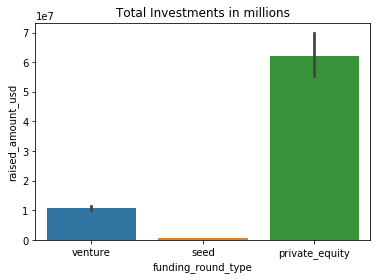

In [42]:
#A plot showing the fraction of total investments (globally) in venture, seed, and private equity,
#and the average amount of investment in each funding type. 
#This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

stk_list = ['venture','seed','private_equity']
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame[master_frame['funding_round_type'].isin(stk_list)])
plt.title("Total Investments in millions")
plt.show()


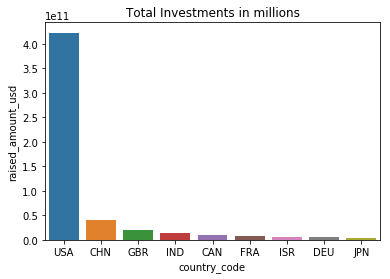

In [43]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT. 
#This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.
top9_1 = df_venture_funding_type.groupby(df_venture_funding_type['country_code']).raised_amount_usd.sum().sort_values(ascending = False).nlargest(9).reset_index()
sns.barplot(x='country_code', y='raised_amount_usd', data=top9_1)
plt.title("Total Investments in millions")
plt.show()

In [44]:
#A plot showing the number of investments in the top 3 
#sectors of the top 3 countries on one chart (for the chosen investment type FT). 

top_countries = ['USA','GBR','IND']
country_information = Country_Venture_Mapping.loc[Country_Venture_Mapping['country_code_x'].isin(top_countries)]
sector_country_information = country_information.groupby(["country_code_x","main_category"]).main_category.count().sort_values(ascending=False).rename('count').reset_index()
top_sector_per_country = sector_country_information.groupby('country_code_x').head(3)
top_sector_per_country

,country_code_x,main_category,count
0,USA,Others,8735
1,USA,Cleantech / Semiconductors,8127
2,USA,"Social, Finance, Analytics, Advertising",5589
8,GBR,Others,576
9,GBR,Cleantech / Semiconductors,456
10,GBR,"Social, Finance, Analytics, Advertising",361
11,IND,Others,330
14,IND,"News, Search and Messaging",154
17,IND,"Social, Finance, Analytics, Advertising",104


Text(0.5,1,'Count Of Sectors in India')

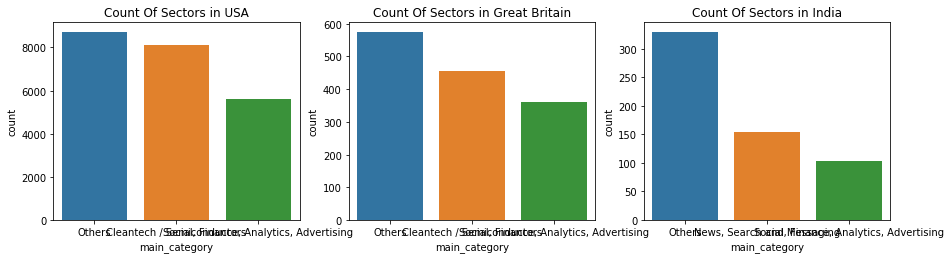

In [45]:
#A plot showing the number of investments in the top 3 
#sectors of the top 3 countries on one chart (for the chosen investment type FT). 

plt.figure(figsize = (15,8))

# subplot 1: Sales
plt.subplot(2,3, 1)
sns.barplot(x='main_category', y='count', data=top_sector_per_country[top_sector_per_country['country_code_x'] == 'USA'])
plt.title("Count Of Sectors in USA")


# subplot 2: Profit
plt.subplot(2, 3, 2)
sns.barplot(x='main_category', y='count', data=top_sector_per_country[top_sector_per_country['country_code_x'] == 'GBR'])
plt.title("Count Of Sectors in Great Britain")


# subplot 2: Profit
plt.subplot(2, 3, 3)
sns.barplot(x='main_category', y='count', data=top_sector_per_country[top_sector_per_country['country_code_x'] == 'IND'])
plt.title("Count Of Sectors in India")